# Detecting nozzle positions

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
# global packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# local packages
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.im.imshow import imshow
import py.vid.noz_detect as nt
import py.file.file_handling as fh
import py.im.morph as vm

# logging
LOGGERDEFINED = logs.openLog('nozzle_detect.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# detect all nozzles

In [165]:
df = nt.findBadBackgrounds(os.path.join(cfg.path.server, 'singleDoubleTriple'), os.path.join(cfg.path.fig, 'singleDoubleTriple'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDoubleTriple\badBackgrounds.csv


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO\I_SO10_S_4.00\I_SO10_S_4.00_230208\disturbVert2_3_1.250\disturbVert2_3_1.250_background_I_SO10_S_4.00_230208_185820_8.png
Count 1 mm 137


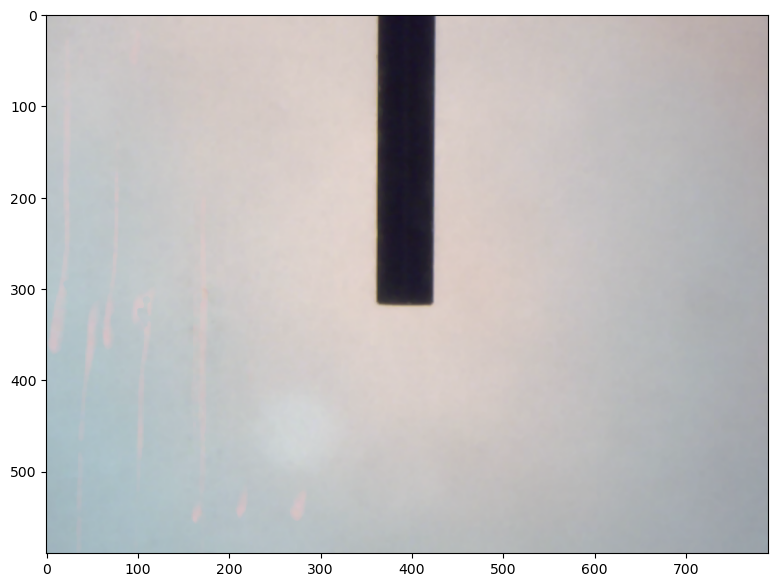

In [48]:
nt.fixBackground(os.path.join(cfg.path.server, r'singleDoubleTriple\SO\I_SO10_S_4.00\I_SO10_S_4.00_230208\disturbVert2_3_1.250'), diag=1)

42
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDoubleTriple\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-0.5_S_4.00_230215\disturbXS2_2_+z_0.750\disturbXS2_2_+z_0.750_background_I_SO6-S20-0.5_S_4.00_230215_183226_4.png
Count 1 mm 139


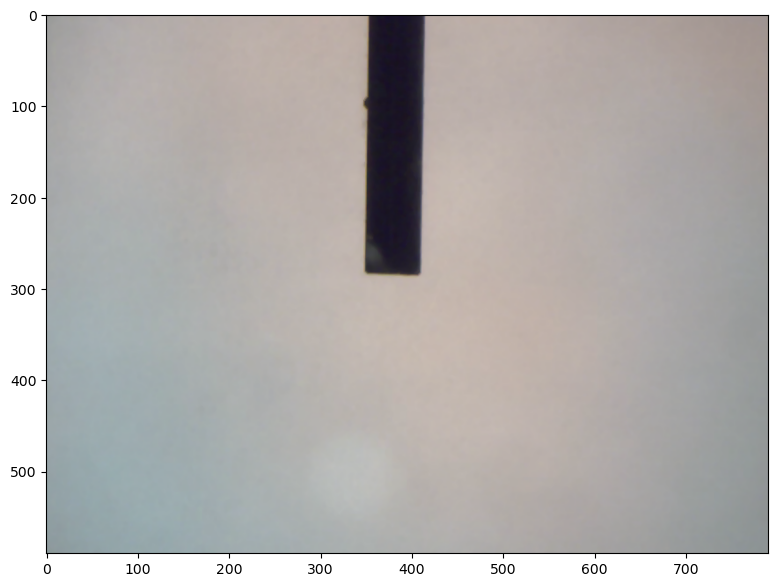

In [164]:
for i in [42]:
    print(i)
    nt.fixBackground(df.loc[i, 'folder'], diag=1)

In [96]:
len(badPics)

65

In [104]:
badPics.loc[1, 'folder']

'//cfs2e.nist.gov/642/internal/3DPrintingLab/Shopbot/videos/singleDoubleTriple/SO/I_SO10_S_3.00/I_SO10_S_3.00_230208/disturbXS2_1_+y_0.625'

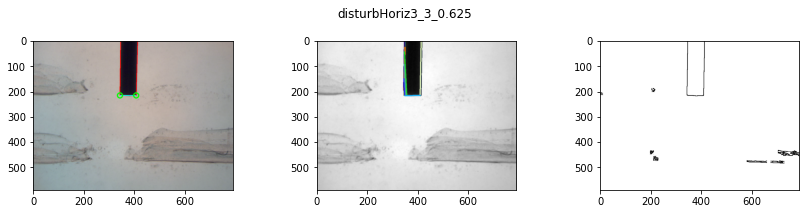

In [187]:
for f in [errorList[1]]:
    nd = nt.nozData(f)
#     nd.exportBackground(overwrite=True, diag=2, numpics=8, zmin=-15)
    nd.detectNozzle(diag=2)
    nd.nozDims()

In [131]:
fh.openExplorer(f)

In [178]:
errorList = nt.exportNozDimsRecursive(os.path.join(cfg.path.server, r'singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_2_0.500')
                                      , overwrite=True, diag=0)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_nozDims_I_SO10_S_3.00_230208_105240_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDoubleTriple\SO\I_SO10_S_3.00\I_SO10_S_3.00_230208\disturbHoriz3_2_0.500\disturbHoriz3_2_0.500_background_I_SO10_S_3.00_230208_105240_0.png


In [177]:
errorList

[]

# detect one nozzle

In [115]:
fh.openExplorer(folder)

{'xL': 322, 'xR': 388, 'yB': 313}

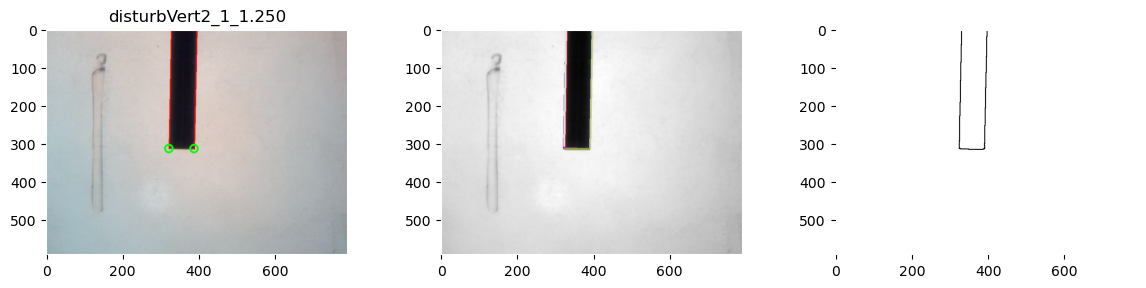

In [35]:
folder = os.path.join(cfg.path.server, r'singleDoubleTriple\SO\I_SO10_S_3.50\I_SO10_S_3.50_230208\disturbVert2_1_1.250')
nv = nt.nozData(folder)
nv.detectNozzle(diag=2, overwrite=True, export=False)
nv.nozDims()

In [37]:
folder = os.path.join(cfg.path.server, r'singleDoubleTriple\SO\I_SO10_S_3.50\I_SO10_S_3.50_230208\disturbVert2_1_1.250')
nv = nt.nozData(folder)
nv.exportBackground(diag=2, overwrite=False)

.............F.........
FAIL: runTest (__main__.TestNozDetect)
----------------------------------------------------------------------
AssertionError: False is not true : text_yB failed on //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\mineral812S LapRDT\I_M7S_S_2.75T\I_M7S_S_2.75T_210922, expected-actual = -22.0

----------------------------------------------------------------------
Ran 23 tests in 38.985s

FAILED (failures=1)


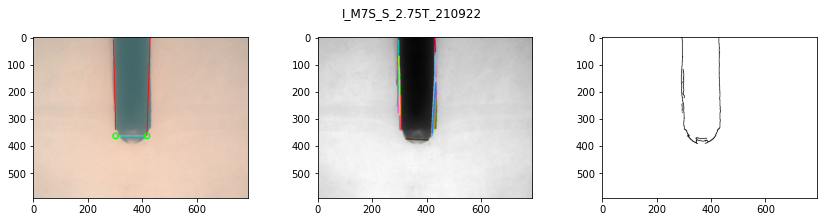

In [127]:
run ../../tests/test_nozDetect